<a href="https://colab.research.google.com/github/sahug/time-series/blob/main/TSA%20-%20Basics%20-%20Simple%2C%20Cumulative%2C%20Exponential%2C%20ACF%2C%20PACF%2C%20ARM%2C%20MA%2C%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSA - Basics - Simple, Cumulative, Exponential, ACF, PACF, ARM, MA, ARIMA**

In [1]:
# %pip uninstall -qq statsmodels
%pip install -qq statsmodels --upgrade

Proceed (y/n)? y


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df_temp = pd.read_csv("/content/daily-temp.csv")
df_temp.head()

,Date,Temperature
0,1981-01-01,38.1
1,1981-01-02,32.4
2,1981-01-03,34.5
3,1981-01-04,20.7
4,1981-01-05,21.5


In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3650 non-null   object 
 1   Temperature  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


**Set Index**

In [5]:
df_temp.set_index("Date", inplace=True)

**Average Temp**

In [6]:
df_temp["AvgTemp"] = df_temp.mean(axis=1)
df_temp.head()

,Temperature,AvgTemp
Date,,
1981-01-01,38.1,38.1
1981-01-02,32.4,32.4
1981-01-03,34.5,34.5
1981-01-04,20.7,20.7
1981-01-05,21.5,21.5


**Simple Moving Average (SMA)**

In [7]:
df_temp["SMA10"] = df_temp.AvgTemp.rolling(10, min_periods=1).mean()
df_temp["SMA20"] = df_temp.AvgTemp.rolling(20, min_periods=1).mean()

In [8]:
df_temp.head()

,Temperature,AvgTemp,SMA10,SMA20
Date,,,,
1981-01-01,38.1,38.1,38.100,38.100
1981-01-02,32.4,32.4,35.250,35.250
1981-01-03,34.5,34.5,35.000,35.000
1981-01-04,20.7,20.7,31.425,31.425
1981-01-05,21.5,21.5,29.440,29.440


**Plot**

[]

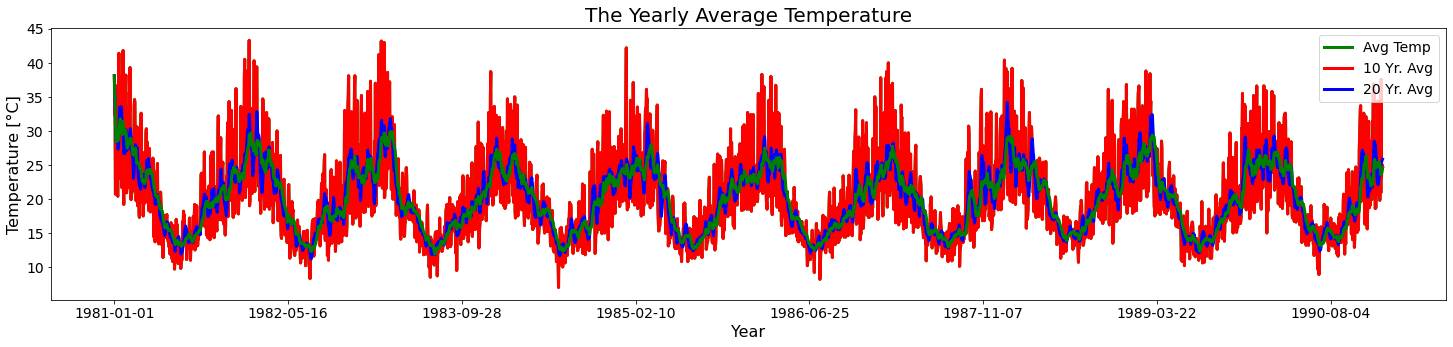

In [9]:
colors = ['green', 'red', 'blue']

# Line Plot
df_temp.plot(color=colors, linewidth=3, figsize=(25, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=["Avg Temp", "10 Yr. Avg", "20 Yr. Avg"], fontsize=14)
plt.title('The Yearly Average Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)
plt.plot()

**Cumulative Moving Average (CMA)**

In [10]:
df_temp["CMA"] = df_temp.AvgTemp.expanding().mean()
df_temp.head()

,Temperature,AvgTemp,SMA10,SMA20,CMA
Date,,,,,
1981-01-01,38.1,38.1,38.100,38.100,38.100
1981-01-02,32.4,32.4,35.250,35.250,35.250
1981-01-03,34.5,34.5,35.000,35.000,35.000
1981-01-04,20.7,20.7,31.425,31.425,31.425
1981-01-05,21.5,21.5,29.440,29.440,29.440


[]

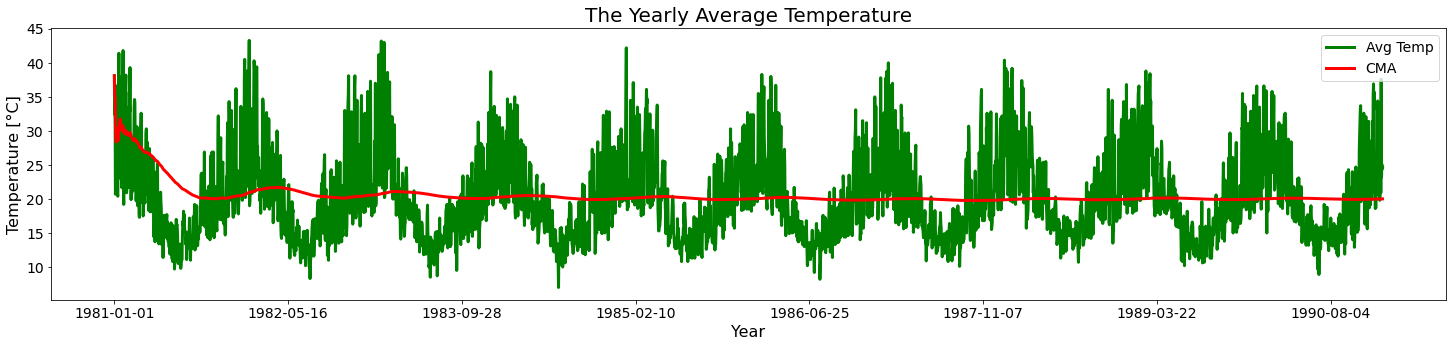

In [11]:
colors = ['green', 'red']

# Line Plot
df_temp[["AvgTemp", "CMA"]].plot(color=colors, linewidth=3, figsize=(25, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=["Avg Temp", "CMA"], fontsize=14)
plt.title('The Yearly Average Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)
plt.plot()

**Exponential Moving Average (EMA)**

In [12]:
df_temp["EMA0.1"] = df_temp.AvgTemp.ewm(alpha=0.1, adjust=False).mean()
df_temp["EMA0.3"] = df_temp.AvgTemp.ewm(alpha=0.3, adjust=False).mean()
df_temp.head()

,Temperature,AvgTemp,SMA10,SMA20,CMA,EMA0.1,EMA0.3
Date,,,,,,,
1981-01-01,38.1,38.1,38.100,38.100,38.100,38.10000,38.10000
1981-01-02,32.4,32.4,35.250,35.250,35.250,37.53000,36.39000
1981-01-03,34.5,34.5,35.000,35.000,35.000,37.22700,35.82300
1981-01-04,20.7,20.7,31.425,31.425,31.425,35.57430,31.28610
1981-01-05,21.5,21.5,29.440,29.440,29.440,34.16687,28.35027


[]

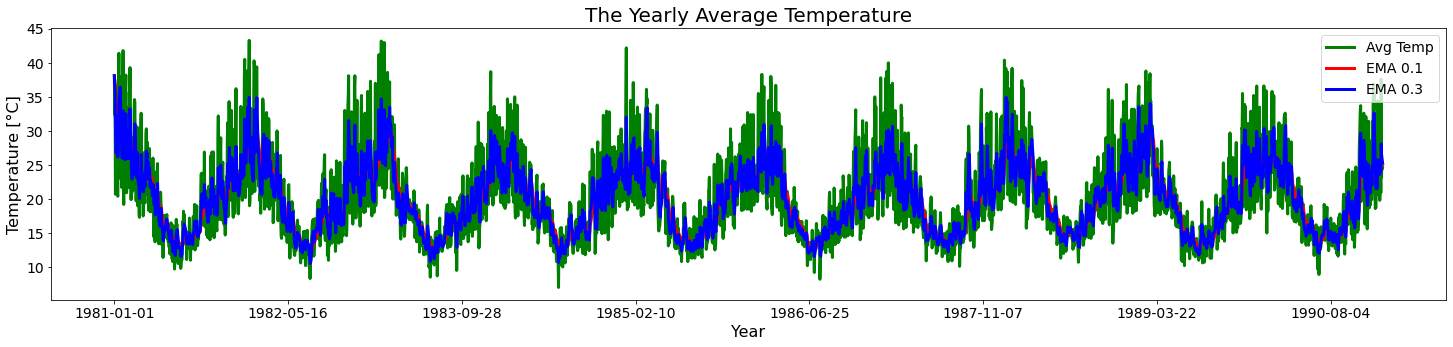

In [13]:
colors = ['green', 'red', 'blue']

# Line Plot
df_temp[["AvgTemp", "EMA0.1", "EMA0.3"]].plot(color=colors, linewidth=3, figsize=(25, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=["Avg Temp", "EMA 0.1", "EMA 0.3"], fontsize=14)
plt.title('The Yearly Average Temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)
plt.plot()

**Auto-Correlation Function (ACF)**

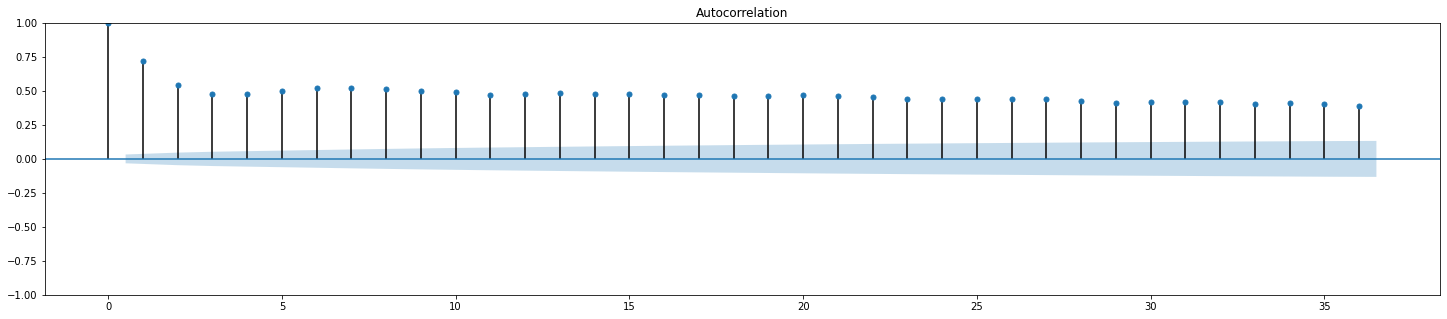

In [14]:
fig = plot_acf(df_temp["AvgTemp"])
fig.set_size_inches(25, 5)
plt.show()

**Partial Auto-Correlation (PACF)**

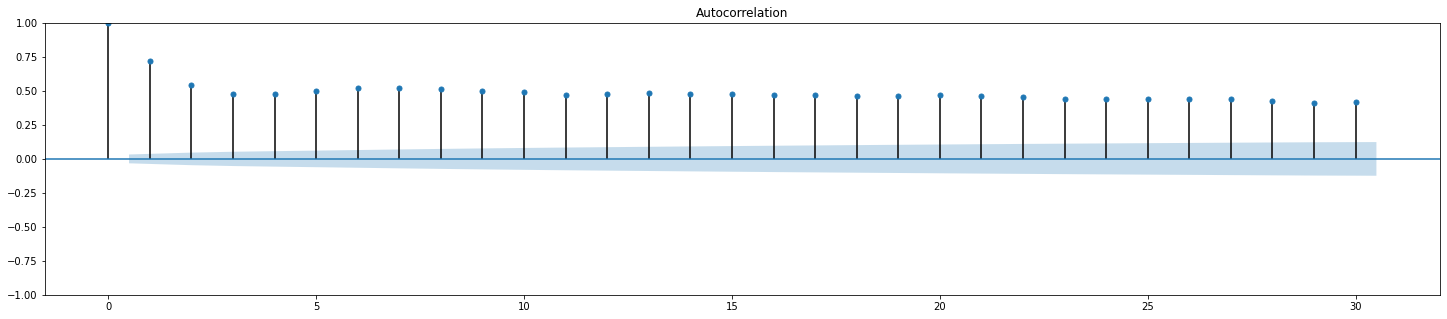

In [15]:
fig = plot_acf(df_temp["AvgTemp"], lags=30)
fig.set_size_inches(25, 5)
plt.show()

**Auto-Regressive Model (ARM)**

In [16]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

In [37]:
lag_plot(df_temp["AvgTemp"])
pyplot.show()

KeyError: ignored

<Figure size 1800x360 with 0 Axes>

In [18]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
df_temp = pd.read_csv('/content/daily-temp.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = df_temp.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [24]:
train

array([32.4, 34.5, 20.7, ..., 30.3, 19.8, 23.3])

**Autoregression**

In [25]:
model = AutoReg(train, lags=20)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 1.32437946  0.55572113 -0.10161322  0.01406369  0.02675286  0.044103
  0.06142259  0.03741632  0.05466144  0.00247029  0.05474968 -0.02756857
  0.03907076  0.03171123 -0.00328337  0.03868939 -0.00607427  0.04695897
 -0.00308074  0.0252273   0.0416088 ]


In [26]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [27]:
predictions

array([24.23761938, 24.08111726, 24.21657852, 22.84119819, 22.95313952,
       22.94786186, 22.47090226])

In [28]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=24.237619, expected=29.300000
predicted=24.081117, expected=20.900000
predicted=24.216579, expected=37.600000
predicted=22.841198, expected=23.200000
predicted=22.953140, expected=25.100000
predicted=22.947862, expected=24.400000
predicted=22.470902, expected=24.600000


In [29]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.685


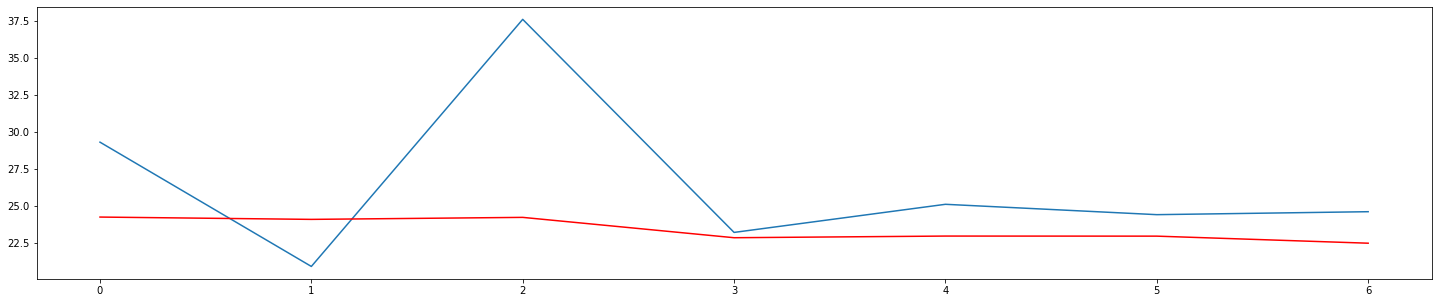

In [36]:
pyplot.figure(figsize=(25,5))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Moving Average**

Text(0, 0.5, 'Weights')

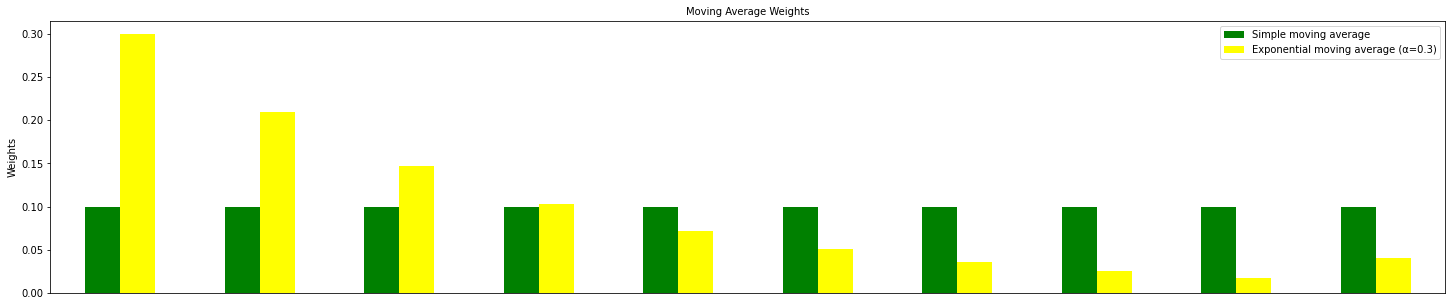

In [33]:
import numpy as np
alpha= 0.3
n = 10
w_sma = np.repeat(1/n, n)
colors = ['green', 'yellow']

# weights - exponential moving average alpha=0.3 adjust=False
w_ema = [(1-alpha)**i if i==n-1 else alpha*(1-alpha)**i for i in range(n)]
pd.DataFrame({'w_sma': w_sma, 'w_ema': w_ema}).plot(color=colors, kind='bar', figsize=(25,5))
plt.xticks([])
plt.yticks(fontsize=10)
plt.legend(labels=['Simple moving average', 'Exponential moving average (α=0.3)'], fontsize=10)

# title and labels
plt.title('Moving Average Weights', fontsize=10)
plt.ylabel('Weights', fontsize=10)

**ARIMA**

In [39]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_temp, order=(0, 1, 1)) 
results_ARIMA = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                 3650
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -10523.652
Date:                Wed, 08 Jun 2022   AIC                          21051.304
Time:                        19:40:16   BIC                          21063.708
Sample:                             0   HQIC                         21055.722
                               - 3650                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7703      0.009    -89.303      0.000      -0.787      -0.753
sigma2        18.7251      0.383     48.903      0.000      17.975      19.476
===================================================================================
Ljung-Box (L1) (Q):                 359.98   Jarque-Bera (JB):               213.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
results_ARIMA.forecast(3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


3650    25.401691
3651    25.401691
3652    25.401691
Name: predicted_mean, dtype: float64

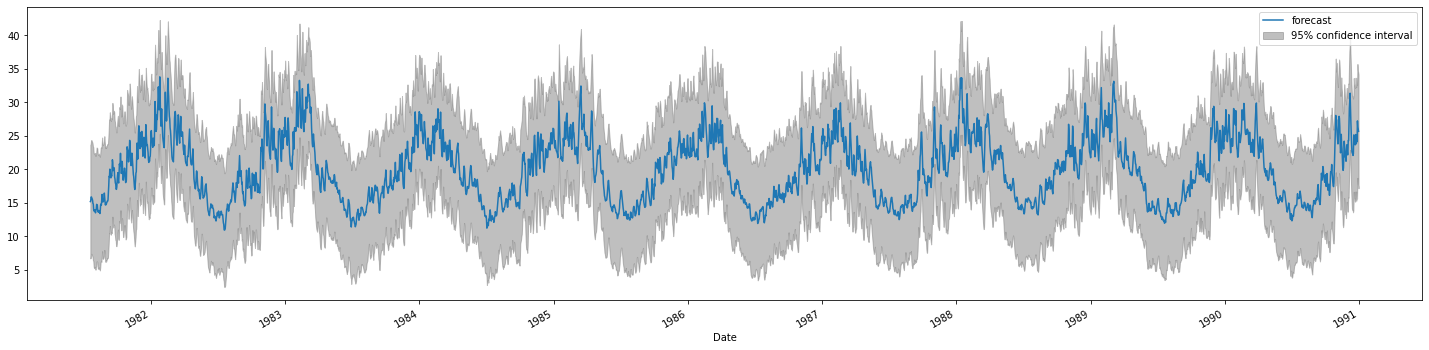

In [52]:
from statsmodels.graphics.tsaplots import plot_predict
plt.rc("figure", figsize=(25,6))
plot_predict(results_ARIMA, start=200)
plt.show()